**Previsão se uma massa de mamografia é benigna ou maligna**

Conjunto de dados púlblicos  "massas mamográficas" do repositório UCI (https://archive.ics.uci.edu/ml/datasets/Mammographic+Mass)

Estes dados contêm 961 ocorrências de massas detectadas em mamografias, e contém os seguintes atributos:

BI-RADS avaliação: 1 to 5 (ordinal)

Age: Idade da paciente em anos (inteiro)

Shape: Forma da Massa: round=1 oval=2 lobular=3 irregular=4 (nominal)

Margin: Margem de Massa : circunscrita =1 microlobulado=2 obscuracida=3 Mal- Definida=4 Espiculada=5 (nominal)

Density: Densidade de Massa: Alta=1 Isodensos=2 Baixa=3 Contendo Gordura=4 (ordinal)

Severity: Gravidade: benigna=0 ou maligna=1 (binominal)

BI-RADS(Breast Imaging Reporting and Data System) é uma avaliação de quão confiável é a classificação de gravidade; não é um atributo "preditivo" e por isso vamos descartá-lo. A idade, forma da massa, margem de massa, e  densidade são atributos e os recursos com os quais construiremos nosso modelo, e "gravidade" é a classificação que tentaremos prever com base nesses atributos.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
dados_massas = pd.read_csv('/content/drive/MyDrive/mammographic_masses.data.txt')
dados_massas.head()

,5,67,3,5.1,3.1,1
0,4,43,1,1,?,1
1,5,58,4,5,3,1
2,4,28,1,1,3,0
3,5,74,1,5,?,1
4,4,65,1,?,3,0


In [3]:
dados_massas = pd.read_csv('/content/drive/MyDrive/mammographic_masses.data.txt', na_values=['?'], names=['BI-RADS', 'age', 'shape', 'margin', 'density', 'severity'])
dados_massas.head(10)

,BI-RADS,age,shape,margin,density,severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1
5,4.0,65.0,1.0,NaN,3.0,0
6,4.0,70.0,NaN,NaN,3.0,0
7,5.0,42.0,1.0,NaN,3.0,0
8,5.0,57.0,1.0,5.0,3.0,1
9,5.0,60.0,NaN,5.0,1.0,1


In [4]:
dados_massas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BI-RADS   959 non-null    float64
 1   age       956 non-null    float64
 2   shape     930 non-null    float64
 3   margin    913 non-null    float64
 4   density   885 non-null    float64
 5   severity  961 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 45.2 KB


In [5]:
dados_massas.describe()

,BI-RADS,age,shape,margin,density,severity
count,959.000000,956.000000,930.000000,913.000000,885.000000,961.000000
mean,4.348279,55.487448,2.721505,2.796276,2.910734,0.463059
std,1.783031,14.480131,1.242792,1.566546,0.380444,0.498893
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


In [6]:
dados_massas.isnull().sum()

BI-RADS      2
age          5
shape       31
margin      48
density     76
severity     0
dtype: int64

**Preenchendo registros faltantes usando Inputer**

In [7]:
from sklearn.impute import SimpleImputer

In [8]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

In [9]:
dados_massas[['BI-RADS', 'age', 'shape', 'margin', 'density']]= imp.fit_transform(dados_massas[['BI-RADS', 'age', 'shape', 'margin', 'density']])

In [10]:
dados_massas.head(10)

,BI-RADS,age,shape,margin,density,severity
0,5.0,67.0,3.000000,5.000000,3.000000,1
1,4.0,43.0,1.000000,1.000000,2.910734,1
2,5.0,58.0,4.000000,5.000000,3.000000,1
3,4.0,28.0,1.000000,1.000000,3.000000,0
4,5.0,74.0,1.000000,5.000000,2.910734,1
5,4.0,65.0,1.000000,2.796276,3.000000,0
6,4.0,70.0,2.721505,2.796276,3.000000,0
7,5.0,42.0,1.000000,2.796276,3.000000,0
8,5.0,57.0,1.000000,5.000000,3.000000,1
9,5.0,60.0,2.721505,5.000000,1.000000,1


In [11]:
dados_massas.describe()

,BI-RADS,age,shape,margin,density,severity
count,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000
mean,4.348279,55.487448,2.721505,2.796276,2.910734,0.463059
std,1.781173,14.442373,1.222561,1.526880,0.365074,0.498893
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


In [12]:
#substituindo algumas colunas
dm_sub = dados_massas[['age', 'shape', 'margin', 'density']]

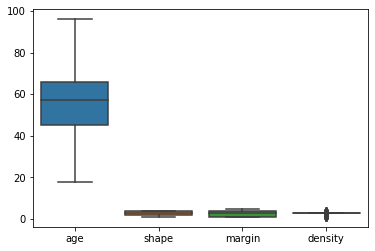

In [13]:
#plota boxplot de algumas colunas
sns.boxplot(data=dm_sub)


# **Algoritmos de Machine Learning**

**Separa os dados e suas classes**

In [157]:
x = dados_massas[['age', 'shape',
                             'margin', 'density']].values

y = dados_massas['severity'].values

feature_names = ['age', 'shape', 'margin', 'density']

x                           

array([[67.        ,  3.        ,  5.        ,  3.        ],
       [43.        ,  1.        ,  1.        ,  2.91073446],
       [58.        ,  4.        ,  5.        ,  3.        ],
       ...,
       [64.        ,  4.        ,  5.        ,  3.        ],
       [66.        ,  4.        ,  5.        ,  3.        ],
       [62.        ,  3.        ,  3.        ,  3.        ]])

In [73]:
#importa o StadardScaler da scikit-learn
from sklearn import preprocessing


In [74]:
#cria o objeto scaler 
#aplicando o padronizador nos dados
scaler = preprocessing.StandardScaler()
x = scaler.fit_transform(x)
x

array([[ 0.79755224,  0.22791465,  1.44403739,  0.24464071],
       [-0.86508983, -1.40884695, -1.17704837,  0.        ],
       [ 0.17406146,  1.04629545,  1.44403739,  0.24464071],
       ...,
       [ 0.58972198,  1.04629545,  1.44403739,  0.24464071],
       [ 0.72827549,  1.04629545,  1.44403739,  0.24464071],
       [ 0.45116848,  0.22791465,  0.13349451,  0.24464071]])

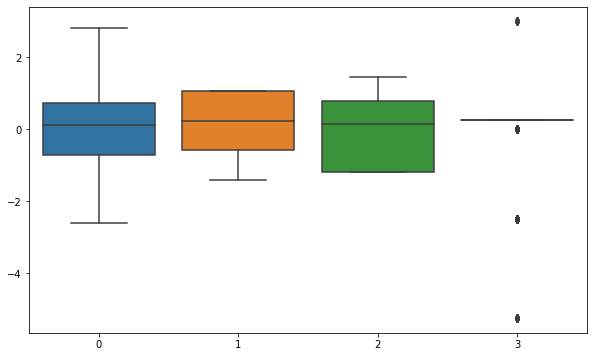

In [75]:
#visualizando os boxplot dos dados
plt.figure(figsize=(10,6))
sns.boxplot(data=x)

**Separando porção de treino e testes**

In [76]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

**Aplicando Machine Learning nos Modelos**

**Decision Tree**

In [77]:
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier()
clf_tree.fit(x_train,y_train)


DecisionTreeClassifier()

In [78]:
clf_tree.predict(x_test)

array([0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1])

**Validação do Modelo**

In [79]:
clf_tree.score(x_test, y_test)

0.7046632124352331

**Cross Validation**

In [115]:
from sklearn.model_selection import cross_val_score

In [81]:
clf_tree = DecisionTreeClassifier()
cv_scores = cross_val_score(clf_tree, x, y, cv=10)

In [82]:
cv_scores.mean()

0.7398732817869416

**Random Forest**

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
clf_tree = RandomForestClassifier(n_estimators =10)
cv_scores = cross_val_score(clf_tree, x, y, cv=10)


In [85]:
cv_scores.mean()

0.771069587628866

**SVM**

In [86]:
from sklearn import svm
C= 1.0
clf = svm.SVC(kernel ='linear',C=C)
cv_scores = cross_val_score(clf, x, y, cv=10)
cv_scores.mean()

0.7919243986254296

In [87]:
C = 1.0
clf = svm.SVC(kernel ='rbf', C=C)
cv_scores = cross_val_score(clf, x, y, cv=10)
cv_scores.mean()

0.8022658934707904

In [88]:
C = 1.0
clf = svm.SVC(kernel ='sigmoid', C=C)
cv_scores = cross_val_score(clf, x, y, cv=10)
cv_scores.mean()

0.7388745704467354

In [89]:
C = 1.0
clf = svm.SVC(kernel ='poly', C=C)
cv_scores = cross_val_score(clf, x, y, cv=10)
cv_scores.mean()

0.7919029209621992

**KNN**

In [90]:
from sklearn import neighbors

In [91]:
clf = neighbors.KNeighborsClassifier(n_neighbors=10)
cv_scores = cross_val_score(clf, x, y, cv=10)

cv_scores.mean()

0.7939540378006872

In [92]:
#loop para executar KNN com valores de K variando de 1 a 50.
for n in range(1, 50):
    clf = neighbors.KNeighborsClassifier(n_neighbors=n)
    cv_scores = cross_val_score(clf, x, y, cv=10)
    print (n, cv_scores.mean())

1 0.7002899484536084
2 0.6867375429553265
3 0.752330326460481
4 0.7398840206185567
5 0.7741731099656357
6 0.7793921821305843
7 0.7908290378006873
8 0.7908397766323023
9 0.7887671821305842
10 0.7939540378006872
11 0.793943298969072
12 0.7845790378006873
13 0.7887564432989691
14 0.7866731099656358
15 0.7887349656357389
16 0.7825386597938144
17 0.7908182989690722
18 0.7856099656357388
19 0.7856421821305841
20 0.7856421821305842
21 0.7877147766323024
22 0.7866838487972508
23 0.7908505154639175
24 0.7887671821305842
25 0.789819587628866
26 0.7887779209621993
27 0.7908505154639175
28 0.7929445876288661
29 0.7939969931271478
30 0.7939862542955327
31 0.7929553264604812
32 0.7919136597938145
33 0.7919243986254295
34 0.7908934707903781
35 0.7950493986254296
36 0.7940077319587628
37 0.7898625429553265
38 0.7929768041237113
39 0.7971434707903782
40 0.7950708762886598
41 0.7981851374570448
42 0.7981743986254296
43 0.7992160652920963
44 0.7950708762886598
45 0.7888101374570449
46 0.7909042096219931


**Naive Bayes**

In [93]:
from sklearn.naive_bayes import MultinomialNB

In [94]:
scaler = preprocessing.MinMaxScaler()
x_minmax = scaler.fit_transform(x)

clf = MultinomialNB()
cv_scores = cross_val_score(clf, x_minmax, y, cv=10)

cv_scores.mean()

0.7502684707903782

**Regressão Logística**

In [95]:
from sklearn.linear_model import LogisticRegression

In [96]:
clf = LogisticRegression()
cv_scores = cross_val_score(clf, x, y, cv=10)
cv_scores.mean()

0.7981636597938143

**Redes Neurais**

In [97]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential


In [98]:
def create_model():
    model = Sequential()
    #4 features de entradas indo para uma camada de  6 neurônios.
    model.add(Dense(6, input_dim=4, kernel_initializer='normal', activation='relu'))
    # Camada de saída com uma classificação  binaria (benigna or maligna)
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    #modelo de compilação.
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [99]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [100]:
# Modelo Keras com um estimador compatível
estimador = KerasClassifier(build_fn=create_model, epochs=100, verbose=0)
cv_scores = cross_val_score(estimador, x, y, cv=10)
cv_scores.mean()


0.795049399137497

# **PIPELINE**

In [106]:
#Importando as biblitecas de Pipeline e Pré_processadores
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

**Cross Validation**

In [121]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score

In [125]:
#função que retorna a acurácia após fazer uma validação cruzada (cross validation)
def Acuracia(clf, X,y):
    resultados = cross_val_predict(clf, x, y, cv=10)
    return accuracy_score(y,resultados)

In [143]:
#criando os pipeline
pip_1 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', svm.SVC(kernel ='linear'))
    ])
pip_2 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', svm.SVC(kernel ='rbf'))
    ])
pip_3 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', svm.SVC(kernel ='sigmoid'))
    ])
pip_4 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', svm.SVC(kernel ='poly'))
    ])
pip_5 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', DecisionTreeClassifier())
    ])
pip_6 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', RandomForestClassifier(n_estimators =10))
    ])
pip_7 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', neighbors.KNeighborsClassifier(n_neighbors=10))
    ])
pip_8 = Pipeline([
    ('scaler', MinMaxScaler()),
    ('clf', MultinomialNB())
    ])
pip_9 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', LogisticRegression())
    ])

     

In [131]:
#chama a função Acuracia passando os dados da massa e a classe
#Usando pip_1
Acuracia(pip_1, x ,y)

0.7918834547346514

In [132]:
#chama a função Acuracia passando os dados da massa e a classe
#Usando pip_2
Acuracia(pip_2, x ,y)

0.8002081165452654

In [133]:
#chama a função Acuracia passando os dados da massa e a classe
#Usando pip_3
Acuracia(pip_3, x ,y)

0.7315296566077003

In [134]:
#chama a função Acuracia passando os dados da massa e a classe
#Usando pip_4
Acuracia(pip_4, x ,y)

0.7939646201873048

In [149]:
#chama a função Acuracia passando os dados da massa e a classe
#Usando pip_5
Acuracia(pip_5, x ,y)

0.736732570239334

In [150]:
#chama a função Acuracia passando os dados da massa e a classe
#Usando pip_6
Acuracia(pip_6, x ,y)

0.7544224765868887

In [151]:
#chama a função Acuracia passando os dados da massa e a classe
#Usando pip_7
Acuracia(pip_7, x ,y)

0.7877211238293444

In [152]:
#chama a função Acuracia passando os dados da massa e a classe
#Usando pip_8
Acuracia(pip_8, x ,y)

0.7502601456815817

In [144]:
#chama a função Acuracia passando os dados da massa e a classe
#Usando pip_9
Acuracia(pip_9, x ,y)

0.7981269510926119

# **TUNNING**

In [145]:
#Importa o utilitário GridSearchCV
from sklearn.model_selection import GridSearchCV

In [146]:
#lista de valores de C
lista_C = [0.001, 0.01, 0.1, 1, 10, 100]

In [147]:
#lista de valores de Gama
lista_gamma = [0.001, 0.01, 0.1, 1, 10, 100]

In [165]:
#define um dicionário que recebe as listas de  paramêtros e valores
parametros_grid = dict(clf__C= lista_C, clf__gamma = lista_gamma)


In [166]:
#objeto grid recebe paramêtros de Pipeline pip_2 e configurações de cross validation 
#Faz testes exaustivos de combinação por combinação
grid = GridSearchCV(pip_2, parametros_grid, cv=10, scoring='accuracy')

In [167]:
#aplica o GridSearchCv passando os dados de treino e classe
grid.fit(x,y)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf', SVC())]),
             param_grid={'clf__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'clf__gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='accuracy')

# **RESULTADOS DO GRID**

In [ ]:
#imprime o melhor paramêtro
grid.best_params_

In [172]:
#imprime o melhor resultado
grid.best_score_

0.8085158934707903